In [17]:
import os
import csv
import re
dir_path=os.path.expanduser("~/DataMiner/hs_data")
all_text=[]
for file in os.listdir(dir_path):
    print(file)
    with open(os.path.join(dir_path,file)) as csvfile:
        day=[]
        reader=csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            rawrow=', '.join(row)
            print(rawrow)
            if "https" not in rawrow and len(rawrow)>5:
                #regex = re.compile('[^a-zA-Z]')
                regex = re.compile('[,\.!?–]')
                text = regex.sub('', rawrow)
                day.append(text)
        all_text.append(day)

2019-01-24 hs data.csv
https://hs.fi/ulkomaat/art-2000005975602.html,"
Norjan, poliisi, lykkää, neljännen, lumivyöryuhrin, etsinnät, kevääseen
"
https://hs.fi/ulkomaat/art-2000005975564.html,"
Ennätyssuuri, osuus, kyselyyn, vastanneista, amerikkalaisista, ajattelee, nyt, ilmastonmuutoksen, olevan, todellinen
"
https://hs.fi/kaupunki/art-2000005975718.html,"
Järeä, vesijohto, katkesi, Sörnäisissä, keskiviikkoiltana, –, rantatien, liikenne, oli, poikki
"
https://hs.fi/urheilu/art-2000005975748.html,"
Kolmen, maalin, johto, ei, riittänyt, kurittomalle, IFK:lle, –, Arttu, Ruotsalaisen, hattutemppu, nosti, Ilveksen, voittoon, yhdentoista, maalin, kamppailussa
"
https://hs.fi/urheilu/art-2000005975721.html,"
Jokerit, jakoi, maaleja, lahjaksi, –, synkkä, putki, jatkui:, ”Eka, takaisku, oli, epäonnea,, sitten, sitä, harmiteltiin”
"
https://hs.fi/ulkomaat/art-2000005975491.html,"
Venäjä, vapautti, ”seksivalmentajan”,, joka, väitti, pystyvänsä, todistamaan, venäläisoligarkin, yhteydet, Trumpin, 

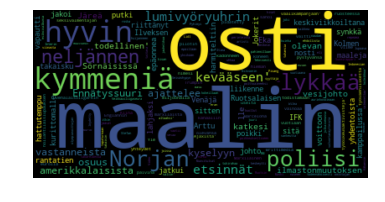

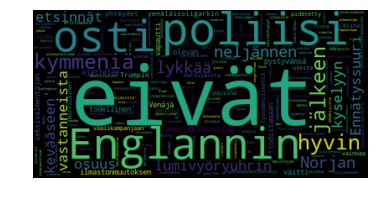

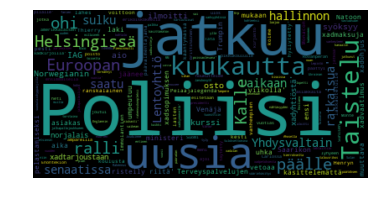

In [19]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline


def makeWordmap(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


konjunktiot=['ei','nyt','oli','jo','se','ovat','on','ja','mutta','ole','se','vain', 'joka','sen','myös','ettei','sanoo','näyttää']
for day in all_text:
    pure_text=day

    for k in konjunktiot:
        #pure_text= [a.replace(k,"") for a in pure_text]
        pure_text= [re.sub(r"\b%s\b" % k, "", a) for a in pure_text]
    makeWordmap(str(pure_text))